In [19]:
# Importing libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score

### Question 1: Statistical learning

### Question 2: MACHINE LEARNING

In [5]:
# https://medium.com/chinmaygaikwad/build-and-visualize-a-simple-decision-tree-using-sklearn-and-graphviz-84bda6b6b894
# 2.3 Consider the challenge of classifying the likelihood of survival using the Titanic dataset.
# Construct a decision tree and display the structure of this tree using a graphic.

# LOADING THE TITANIC DATA & EXTRACTING (age, sex, pclass, survived)
titanic = pd.read_csv('titanic3.csv')
titanic = titanic[['age','sex','pclass','survived']]

meanAge = titanic['age'].mean()                  # CALCULATING THE MEAN AGE

titanicNoNaN = titanic.fillna(meanAge)           # FILLING NAN VALUES - BCZ ONLY AGE COLUMN HAS NANS - USE THE WHOLE DATASET

# TRANSFORMING sex CATEGORIES INTO NUMERICAL VALUES
# Fit label encoder and return encoded labels: MAKING females:0 and males:1
titanicNoNaN['sex'] = LabelEncoder().fit_transform(titanicNoNaN['sex'])

x = titanicNoNaN[['age','sex','pclass']]
y = titanicNoNaN['survived']

In [10]:
# FITTING A CLASSIFICATION MODEL USING DecisionTreeClassifier
dTree = tree.DecisionTreeClassifier(random_state = 0)     # MODEL
dTree.fit(x, y)                                           # TRAINING IT

DecisionTreeClassifier()

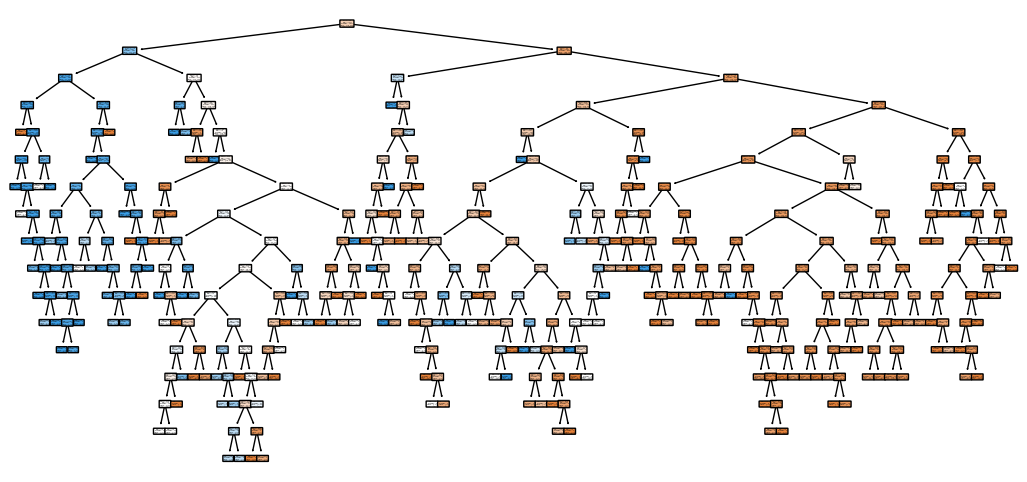

In [11]:
plt.rcParams['figure.figsize'] = (13, 6)
tree.plot_tree(dTree, filled = True, rounded = True, feature_names = x.columns, class_names=['Female', "Male"])
plt.show()

In [25]:
# https://www.w3schools.com/python/trypython.asp?filename=demo_ml_k-fold
# https://www.askpython.com/python/examples/k-fold-cross-validation
# FINDING THE MISCLASSIFICATION ERRORS OF THE TREE USING CROSS-VALIDATION AND IN-SAMPLE TECHNIQUES
cvScores = cross_val_score(dTree, x, y, cv = KFold(n_splits = 10, random_state = 1, shuffle = True))

print("Cross Validation Scores:", cvScores)
print("Average CV Score:", cvScores.mean())
print("Number of CV Scores used in Average:", len(cvScores))

Cross Validation Scores: [0.61068702 0.58015267 0.74045802 0.76335878 0.58015267 0.58778626
 0.64885496 0.75572519 0.7480916  0.7       ]
Average CV Score: 0.671526717557252
Number of CV Scores used in Average: 10


KFold(n_splits=10, random_state=1, shuffle=True)

In [20]:
# PRUNING - Simplify a Decision Tree with an Optimal Maximum Depth
dTree.get_depth()

16

In [21]:
path = dTree.cost_complexity_pruning_path(x, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
dTrees = []

for ccp_alpha in ccp_alphas:
    dTree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    dTree.fit(x, y)
    dTrees.append(dTree)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dTrees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13197038973288777


In [ ]:
# TO BE CONTINUED
# https://github.com/krishnaik06/Post_Pruning_DecisionTre/blob/master/plot_cost_complexity_pruning.ipynb

### Question 3

In [27]:
# LOADING THE TITANIC DATA & EXTRACTING (age, sex, pclass, survived)
titanic = pd.read_csv('titanic3.csv')
titanic = titanic[['age','sex','pclass','survived']]

meanAge = titanic['age'].mean()                  # CALCULATING THE MEAN AGE

titanicNoNaN = titanic.fillna(meanAge)           # FILLING NAN VALUES - BCZ ONLY AGE COLUMN HAS NANS - USE THE WHOLE DATASET
titanicNoNaN

,age,sex,pclass,survived
0,29.000000,female,1,1
1,0.920000,male,1,1
2,2.000000,female,1,0
3,30.000000,male,1,0
4,25.000000,female,1,0
...,...,...,...,...
1304,14.500000,female,3,0
1305,29.881138,female,3,0
1306,26.500000,male,3,0
1307,27.000000,male,3,0


### Question 4